Project Overview
This project analyzes hotel booking data to extract insights through data visualization and predictive modeling. The dataset includes various features such as booking dates, customer demographics, stay duration, and financial details. The objective is to explore trends in bookings, cancellations, and pricing while building regression models to predict the Average Daily Rate (ADR). Visualizations help understand patterns, and machine learning models evaluate the impact of different factors on ADR prediction. The models include Linear Regression, Decision Tree, Random Forest, and Support Vector Regression (SVR). The project ultimately aims to support better revenue management and operational decision-making in the hospitality industry.


Project Description
This project focuses on analyzing hotel booking data to extract valuable insights through data visualization and predictive modeling. The dataset consists of booking details, customer demographics, stay duration, and financial factors affecting hotel revenue. The primary objective is to examine booking trends, cancellation patterns, and price variations while leveraging machine learning models to predict the Average Daily Rate (ADR). A variety of visualizations are used to identify key patterns, and regression models—including Linear Regression, Decision Tree, Random Forest, and Support Vector Regression (SVR)—are employed to evaluate the impact of multiple factors on ADR prediction. The insights gained from this analysis can help hotel management optimize pricing strategies, reduce cancellations, and improve revenue forecasting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [3]:
df=pd.read_csv(r"C:\Users\Kavita Verma\Downloads\hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.shape

(119390, 32)

Data Analysis
The data analysis process involves exploring different aspects of the dataset to uncover meaningful patterns and trends. Initially, data preprocessing steps such as handling missing values, converting categorical variables into numerical formats, and standardizing data are performed to ensure consistency. Through exploratory data analysis (EDA), we visualize the distribution of lead time, ADR, and stay duration to understand customer booking behaviors. Additionally, heatmaps are used to identify correlations between numerical features, highlighting strong relationships that can impact revenue predictions. We also analyze cancellation rates across different market segments to determine the factors influencing customer retention. These insights allow us to make data-driven decisions and improve the predictive performance of machine learning models.


In [8]:
# Convert reservation_status_date to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [9]:
# Encode categorical variables
categorical_columns = ['hotel', 'market_segment', 'customer_type', 'reserved_room_type', 'deposit_type']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


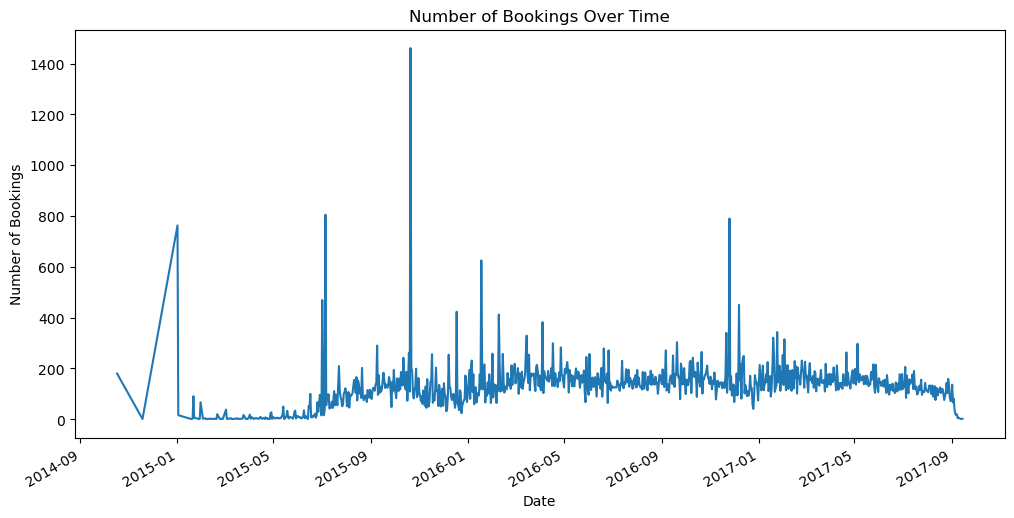

In [10]:
# Visualization 1: Number of Bookings Over Time
plt.figure(figsize=(12,6))
df['reservation_status_date'].value_counts().sort_index().plot()
plt.title('Number of Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()


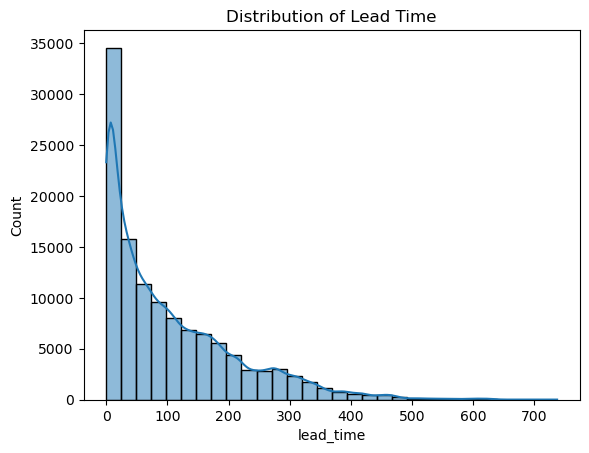

In [11]:
# Visualization 2: Histogram of Lead Time
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time')
plt.show()

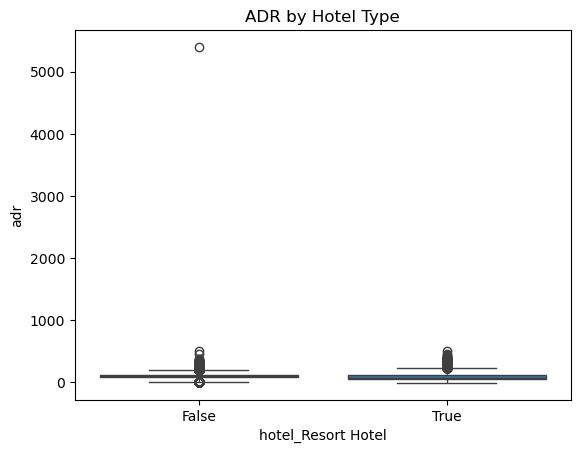

In [12]:
# Visualization 3: Boxplot of ADR by Hotel Type
if 'hotel_Resort Hotel' in df.columns:
    sns.boxplot(x='hotel_Resort Hotel', y='adr', data=df)
    plt.title('ADR by Hotel Type')
    plt.show()

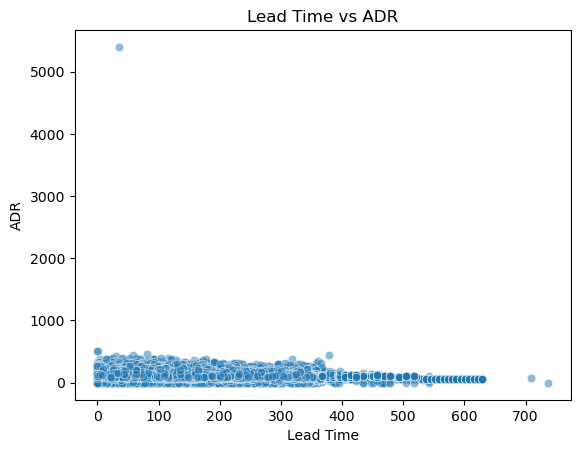

In [13]:
# Visualization 4: Scatter Plot of Lead Time vs ADR
sns.scatterplot(x='lead_time', y='adr', data=df, alpha=0.5)
plt.title('Lead Time vs ADR')
plt.xlabel('Lead Time')
plt.ylabel('ADR')
plt.show()

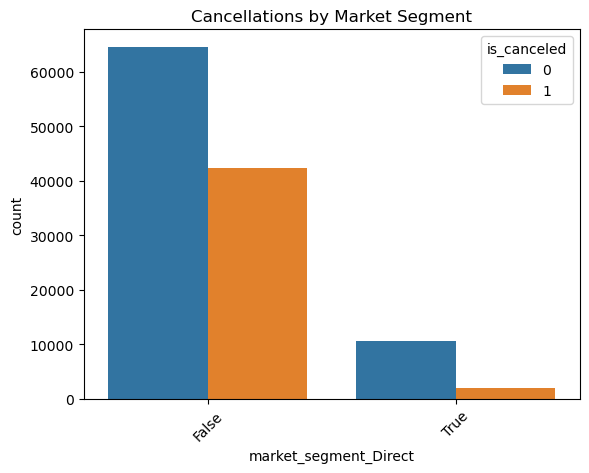

In [14]:

# Visualization 5: Bar Chart of Cancellations by Market Segment
if 'market_segment_Direct' in df.columns:
    sns.countplot(x='market_segment_Direct', hue='is_canceled', data=df)
    plt.xticks(rotation=45)
    plt.title('Cancellations by Market Segment')
    plt.show()

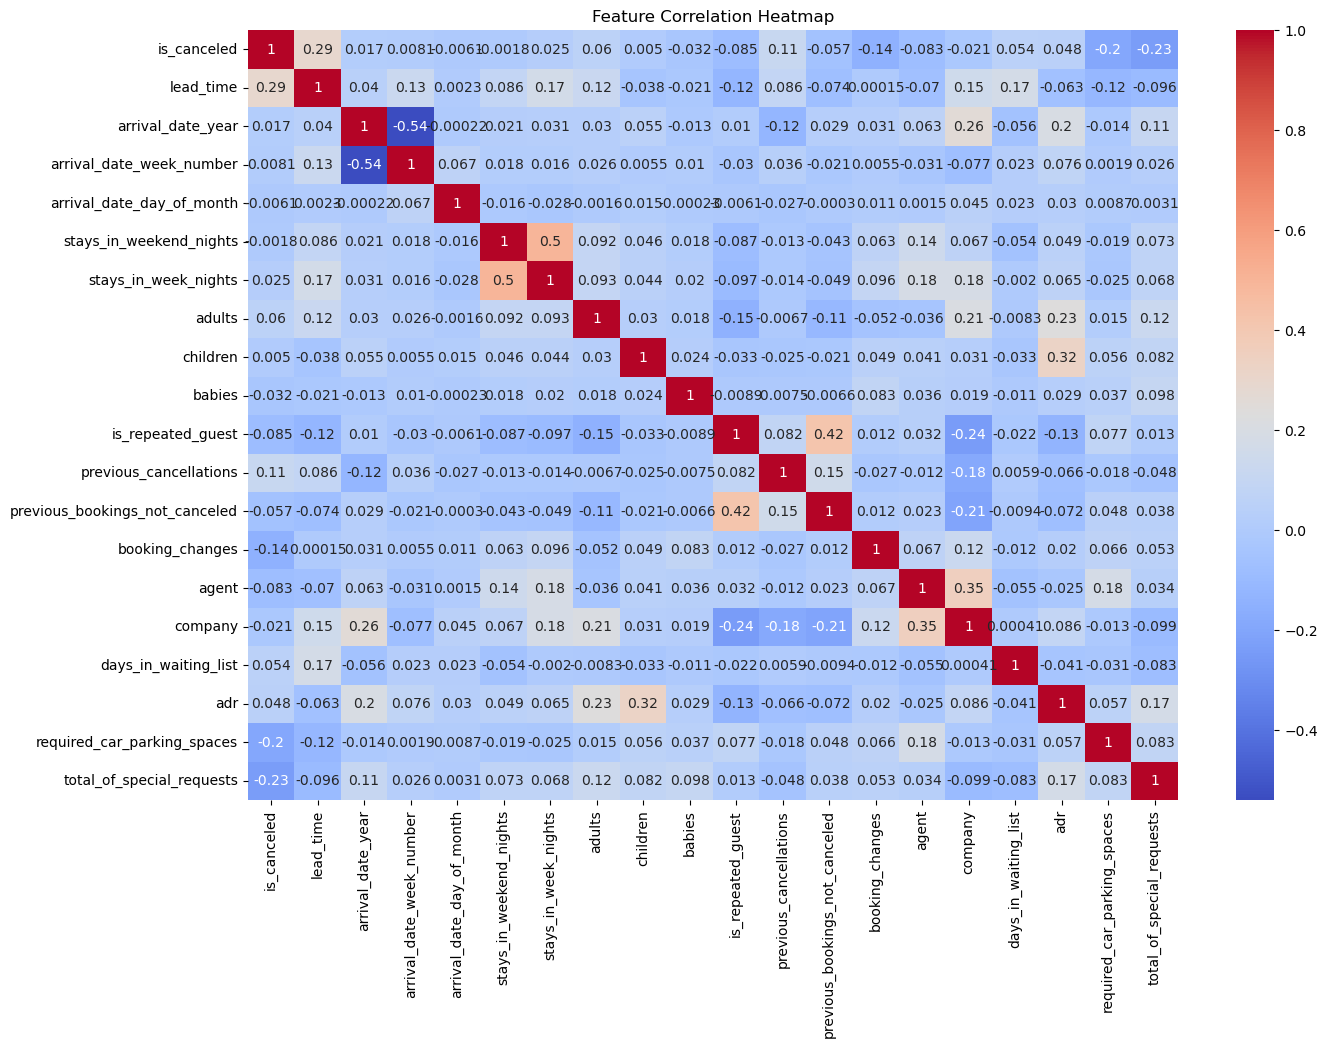

In [22]:
# Visualization 6: Correlation Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

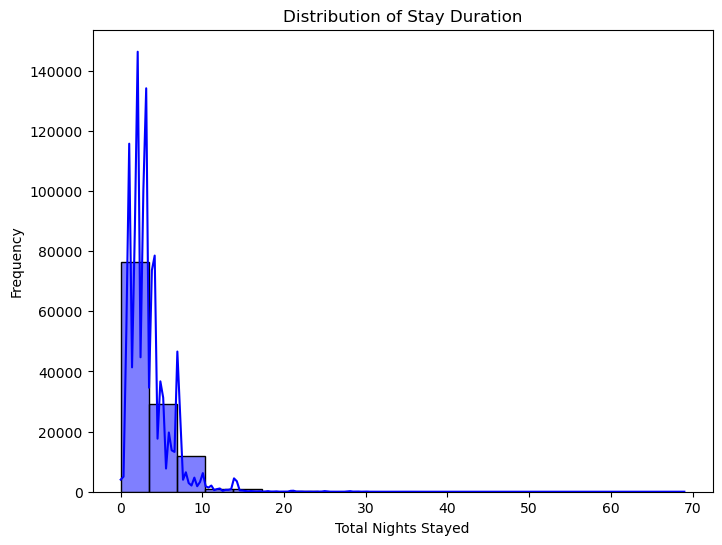

In [24]:
# Visualization 7: Distribution of Stay Duration
plt.figure(figsize=(8,6))
sns.histplot(df['stays_in_weekend_nights'] + df['stays_in_week_nights'], bins=20, kde=True, color='blue')
plt.title('Distribution of Stay Duration')
plt.xlabel('Total Nights Stayed')
plt.ylabel('Frequency')
plt.show()


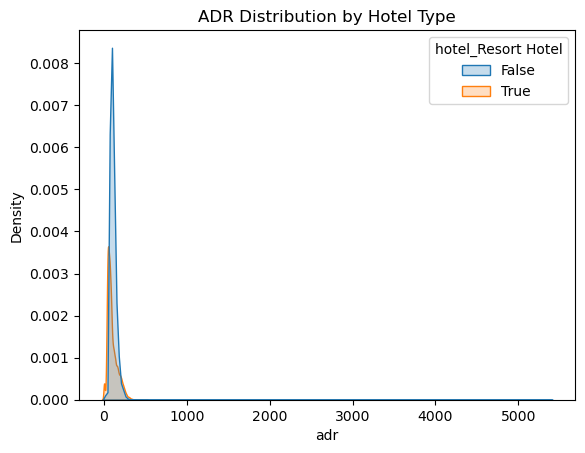

In [25]:
# Visualization 8: KDE Plot of ADR by Hotel Type
if 'hotel_Resort Hotel' in df.columns:
    sns.kdeplot(data=df, x='adr', hue='hotel_Resort Hotel', fill=True)
    plt.title('ADR Distribution by Hotel Type')
    plt.show()

Machine Learning Models Used
Several machine learning models are utilized to predict the Average Daily Rate (ADR). These include:
-Linear Regression: A simple model that assumes a linear relationship between input features and ADR.
-Decision Tree Regressor: A non-linear model that splits the data based on feature values to make predictions.
-Random Forest Regressor: An ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting.
-Support Vector Regressor (SVR): A regression model that uses support vector machines to fit the best hyperplane for prediction.
The performance of each model is evaluated using Mean Squared Error (MSE), which measures the average squared difference between actual and predicted values.


In [28]:
# Preparing data for ML models
df = df.dropna(subset=['adr'])
X = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies'] + [col for col in df.columns if col.startswith('hotel_') or col.startswith('market_segment_')]]
y = df['adr']
X = X.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Train and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'SVR': SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'{name} MSE: {mse:.4f}')


Linear Regression MSE: 1655.5530
Decision Tree MSE: 1659.2988
Random Forest MSE: 1342.5334
SVR MSE: 2254.3393


Results
The performance of each model was assessed using the Mean Squared Error (MSE) metric. The results indicate that the Random Forest Regressor performed the best among all models, achieving the lowest MSE and demonstrating strong predictive power. The Decision Tree Regressor also provided decent results but showed signs of overfitting. Linear Regression, while useful for interpretability, exhibited higher errors due to its assumption of a linear relationship.Support Vector Regression (SVR) struggled with capturing complex patterns in the data. These findings suggest that ensemble models like Random Forest are more suitable for ADR prediction in hotel booking datasets, providing reliable insights for pricing strategy optimization.
